## Importing Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

## Importing the datasets

In [2]:
# Importing the train dataset
train_data = pd.read_csv("Dataset/Train.csv")
train_data.shape

(1284, 19)

In [3]:
# Importing the test dataset
test_data = pd.read_csv("Dataset/Test.csv")
test_data.shape

(964, 18)

## Inspecting the data

In [4]:
train_data.head()

,id_code,current_date,current_time,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend
0,isfywypmkqqhyft,2016-07-27,08:05:51 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
1,mqsfxyvuqpbwomk,2016-07-27,08:06:11 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
2,alspwwtbdvqsgby,2016-07-27,08:08:57 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
3,szitxhhqduyrqpg,2016-07-27,08:09:08 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
4,krisdqzczivvwcp,2016-07-27,08:11:01 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False


In [5]:
train_data.dtypes

id_code                         object
current_date                    object
current_time                    object
source_name                     object
destination_name                object
train_name                      object
target                          object
country_code_source             object
longitude_source               float64
latitude_source                float64
mean_halt_times_source         float64
country_code_destination        object
longitude_destination          float64
latitude_destination           float64
mean_halt_times_destination    float64
current_year                     int64
current_week                     int64
current_day                     object
is_weekend                        bool
dtype: object

In [6]:
test_data.head()

,id_code,current_date,current_time,source_name,destination_name,train_name,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend
0,mckbezdplrukagl,2016-10-06,01:05:38 AM,station$143,station$142,SZAYASZ,whber,4.243393,50.866728,39.121387,whber,4.273543,50.868337,39.121387,2016,40,Thursday,False
1,agxwrnbmzbyxsjg,2016-10-06,01:05:56 AM,station$133,station$147,ICXYXY,whber,4.326220,50.880833,95.676301,whber,4.356801,50.845658,634.164740,2016,40,Thursday,False
2,iqjojyewdyfshtj,2016-10-06,06:11:54 AM,station$632,station$544,ICWAT,whber,3.264549,50.824506,153.115607,whber,3.710675,51.035896,309.014451,2016,40,Thursday,False
3,hssqexnzirioaag,2016-10-06,07:00:00 AM,station$296,station$281,ICWYR,whber,5.599695,50.613152,87.130058,whber,5.566695,50.624550,269.124277,2016,40,Thursday,False
4,lublknpfraiznhr,2016-10-06,07:00:09 AM,station$281,station$266,ICWYR,whber,5.566695,50.624550,269.124277,whber,4.715866,50.882280,351.916185,2016,40,Thursday,False


In [7]:
my_submission = pd.DataFrame({'id_code': test_data['id_code']})
my_submission.head()

,id_code
0,mckbezdplrukagl
1,agxwrnbmzbyxsjg
2,iqjojyewdyfshtj
3,hssqexnzirioaag
4,lublknpfraiznhr


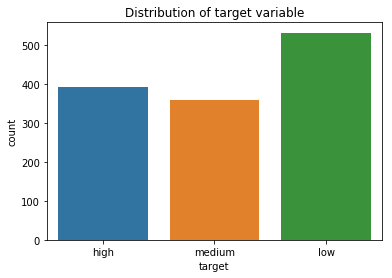

In [8]:
plt.title('Distribution of target variable')
sns.countplot(train_data['target'])
plt.show()

In [9]:
# Studying the target variable
train_data['target'].value_counts()

low       532
high      392
medium    360
Name: target, dtype: int64

In [10]:
train_data.isna().sum()

id_code                         0
current_date                    0
current_time                    0
source_name                     0
destination_name                0
train_name                      0
target                          0
country_code_source             1
longitude_source                1
latitude_source                 1
mean_halt_times_source          1
country_code_destination       33
longitude_destination          33
latitude_destination           33
mean_halt_times_destination    33
current_year                    0
current_week                    0
current_day                     0
is_weekend                      0
dtype: int64

In [11]:
test_data.isna().sum()

id_code                        0
current_date                   0
current_time                   0
source_name                    0
destination_name               0
train_name                     0
country_code_source            0
longitude_source               0
latitude_source                0
mean_halt_times_source         0
country_code_destination       0
longitude_destination          0
latitude_destination           0
mean_halt_times_destination    0
current_year                   0
current_week                   0
current_day                    0
is_weekend                     0
dtype: int64

In [12]:
train_data.nunique()

id_code                        1284
current_date                     61
current_time                   1262
source_name                     188
destination_name                218
train_name                      560
target                            3
country_code_source               4
longitude_source                187
latitude_source                 187
mean_halt_times_source          154
country_code_destination          5
longitude_destination           216
latitude_destination            213
mean_halt_times_destination     171
current_year                      1
current_week                     11
current_day                       7
is_weekend                        2
dtype: int64

In [13]:
test_data.nunique()

id_code                        964
current_date                    24
current_time                   953
source_name                    170
destination_name               168
train_name                     504
country_code_source              3
longitude_source               170
latitude_source                170
mean_halt_times_source         144
country_code_destination         4
longitude_destination          168
latitude_destination           168
mean_halt_times_destination    149
current_year                     1
current_week                     4
current_day                      7
is_weekend                       2
dtype: int64

## Data Preprocessing

In [14]:
# Dropping columns which will be of no use for our model
col_list = ['id_code', 'current_year']

In [15]:
# Dropping columns which will be of no use for our model
train_data = train_data.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

In [16]:
# Function to extraxt year and month from datetime data
def conv_date(date_list):
    for i in date_list:
        train_data[i] = pd.to_datetime(train_data[i])
        test_data[i] = pd.to_datetime(test_data[i])

In [17]:
date_list = ['current_date', 'current_time']
conv_date(date_list)

In [18]:
train_data.dtypes

current_date                   datetime64[ns]
current_time                   datetime64[ns]
source_name                            object
destination_name                       object
train_name                             object
target                                 object
country_code_source                    object
longitude_source                      float64
latitude_source                       float64
mean_halt_times_source                float64
country_code_destination               object
longitude_destination                 float64
latitude_destination                  float64
mean_halt_times_destination           float64
current_week                            int64
current_day                            object
is_weekend                               bool
dtype: object

In [19]:
# Function to obtain year and month from datetime data
def get_year(colname, dfcolname):
    train_data[colname] = train_data[dfcolname].apply(lambda x:x.year)
    test_data[colname] = test_data[dfcolname].apply(lambda x:x.year)
def get_month(colname, dfcolname):
    train_data[colname] = train_data[dfcolname].apply(lambda x:x.month)
    test_data[colname] = test_data[dfcolname].apply(lambda x:x.month)
def get_hour(colname, dfcolname):
    train_data[colname] = train_data[dfcolname].apply(lambda x:x.hour)
    test_data[colname] = test_data[dfcolname].apply(lambda x:x.hour)

In [20]:
get_year('current_year', 'current_date')
get_month('current_month', 'current_date')
get_hour('current_hour', 'current_time')

In [21]:
col_list = ['current_date', 'current_time', 'current_year']

In [22]:
# Dropping columns which will be of no use for our model
train_data = train_data.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

In [23]:
train_data.head()

,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_week,current_day,is_weekend,current_month,current_hour
0,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,30,Wednesday,False,7,20
1,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,30,Wednesday,False,7,20
2,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,30,Wednesday,False,7,20
3,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,30,Wednesday,False,7,20
4,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,30,Wednesday,False,7,20


In [24]:
train_data.isna().sum()

source_name                     0
destination_name                0
train_name                      0
target                          0
country_code_source             1
longitude_source                1
latitude_source                 1
mean_halt_times_source          1
country_code_destination       33
longitude_destination          33
latitude_destination           33
mean_halt_times_destination    33
current_week                    0
current_day                     0
is_weekend                      0
current_month                   0
current_hour                    0
dtype: int64

In [25]:
# Function to impute with None
def impute_none(imp_none_list):
    for i in imp_none_list:
        train_data[i] = train_data[i].fillna('None')
        test_data[i] = test_data[i].fillna('None')

In [26]:
imp_none_list = ['country_code_source', 'country_code_destination']
impute_none(imp_none_list)

In [27]:
# Function to impute missing values by rounded value of mean
def round_mean(imp_mean_list):
    for i in imp_mean_list:
        train_data[i] = train_data[i].fillna(round(train_data[i].mean()))
        test_data[i] = test_data[i].fillna(round(train_data[i].mean()))

In [28]:
imp_mean_list = ['longitude_source', 'latitude_source', 'longitude_destination', 'latitude_destination', 
                 'mean_halt_times_destination', 'mean_halt_times_source']
round_mean(imp_mean_list)

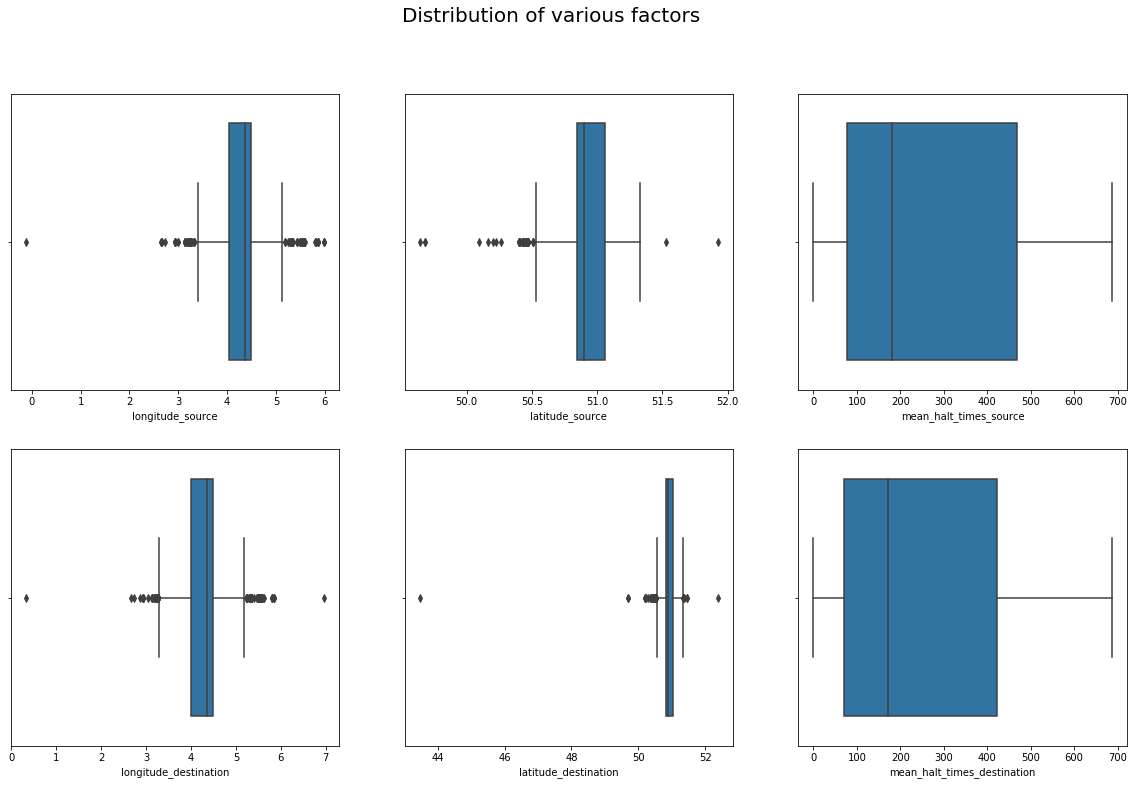

In [29]:
# Plotting a boxplot to study the distribution of features
fig,ax = plt.subplots(2,3, figsize=(20,12))               
plt.suptitle("Distribution of various factors", fontsize=20)
sns.boxplot(train_data['longitude_source'], ax = ax[0,0]) 
sns.boxplot(train_data['longitude_destination'], ax = ax[1,0]) 
sns.boxplot(train_data['latitude_source'], ax = ax[0,1])  
sns.boxplot(train_data['latitude_destination'], ax = ax[1,1])
sns.boxplot(train_data['mean_halt_times_source'], ax = ax[0,2])
sns.boxplot(train_data['mean_halt_times_destination'], ax = ax[1,2])
plt.show()

F:\Installed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


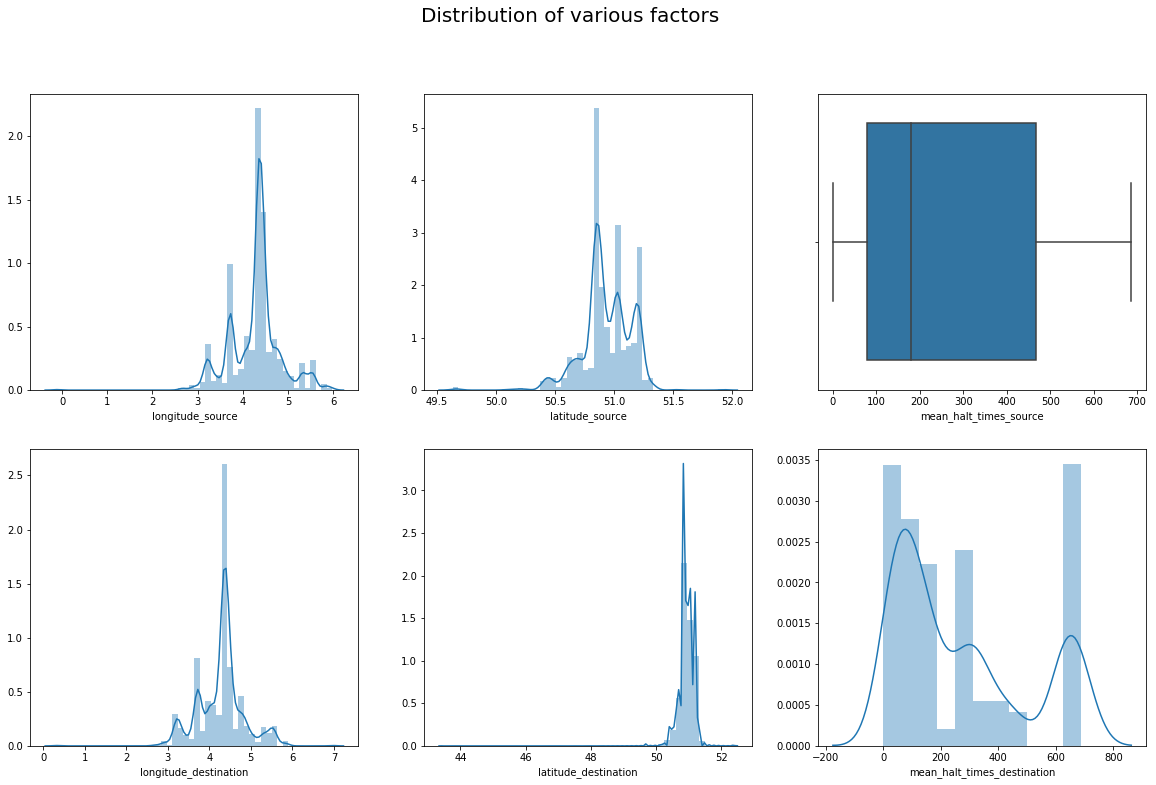

In [30]:
# Plotting a boxplot to study the distribution of features
fig,ax = plt.subplots(2,3, figsize=(20,12))               
plt.suptitle("Distribution of various factors", fontsize=20)
sns.distplot(train_data['longitude_source'], ax = ax[0,0]) 
sns.distplot(train_data['longitude_destination'], ax = ax[1,0]) 
sns.distplot(train_data['latitude_source'], ax = ax[0,1])  
sns.distplot(train_data['latitude_destination'], ax = ax[1,1])  
sns.boxplot(train_data['mean_halt_times_source'], ax = ax[0,2])
sns.distplot(train_data['mean_halt_times_destination'], ax = ax[1,2])
plt.show()

In [31]:
train_data.head()

,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_week,current_day,is_weekend,current_month,current_hour
0,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,None,4.0,51.0,272.0,30,Wednesday,False,7,20
1,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,None,4.0,51.0,272.0,30,Wednesday,False,7,20
2,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,None,4.0,51.0,272.0,30,Wednesday,False,7,20
3,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,None,4.0,51.0,272.0,30,Wednesday,False,7,20
4,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,None,4.0,51.0,272.0,30,Wednesday,False,7,20


## Encoding the values to prepare our model

In [32]:
train_data["target"] = train_data["target"].replace('low', 0)
train_data["target"] = train_data["target"].replace('medium', 1)
train_data["target"] = train_data["target"].replace('high', 2)

In [33]:
# Function to LabelEncode all the non numerical values
def create_dummies(df):
    for i in df.columns:
        if df[i].dtypes=='object':
            print(i,'encoded')
            mask = ~df[i].isnull()
            label_encoder = LabelEncoder() 
            try:
                df[i][mask] = label_encoder.fit_transform(df[i][mask])
                df[i] = df[i].astype(int)
            except Exception as e:
                print(e)
    return df

In [34]:
def encodeBool(l):
    for i in l:
        train_data[i] = train_data[i].replace(False, 0)
        test_data[i] = test_data[i].replace(True, 1)

In [35]:
l = ['is_weekend']
encodeBool(l)

In [36]:
train_data = create_dummies(train_data)

source_name encoded
destination_name encoded
train_name encoded
country_code_source encoded
country_code_destination encoded
current_day encoded


F:\Installed\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [37]:
test_data = create_dummies(test_data)

F:\Installed\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


source_name encoded
destination_name encoded
train_name encoded
country_code_source encoded
country_code_destination encoded
current_day encoded


In [38]:
train_data.dtypes

source_name                      int32
destination_name                 int32
train_name                       int32
target                           int64
country_code_source              int32
longitude_source               float64
latitude_source                float64
mean_halt_times_source         float64
country_code_destination         int32
longitude_destination          float64
latitude_destination           float64
mean_halt_times_destination    float64
current_week                     int64
current_day                      int32
is_weekend                     float64
current_month                    int64
current_hour                     int64
dtype: object

In [39]:
test_data.dtypes

source_name                      int32
destination_name                 int32
train_name                       int32
country_code_source              int32
longitude_source               float64
latitude_source                float64
mean_halt_times_source         float64
country_code_destination         int32
longitude_destination          float64
latitude_destination           float64
mean_halt_times_destination    float64
current_week                     int64
current_day                      int32
is_weekend                     float64
current_month                    int64
current_hour                     int64
dtype: object

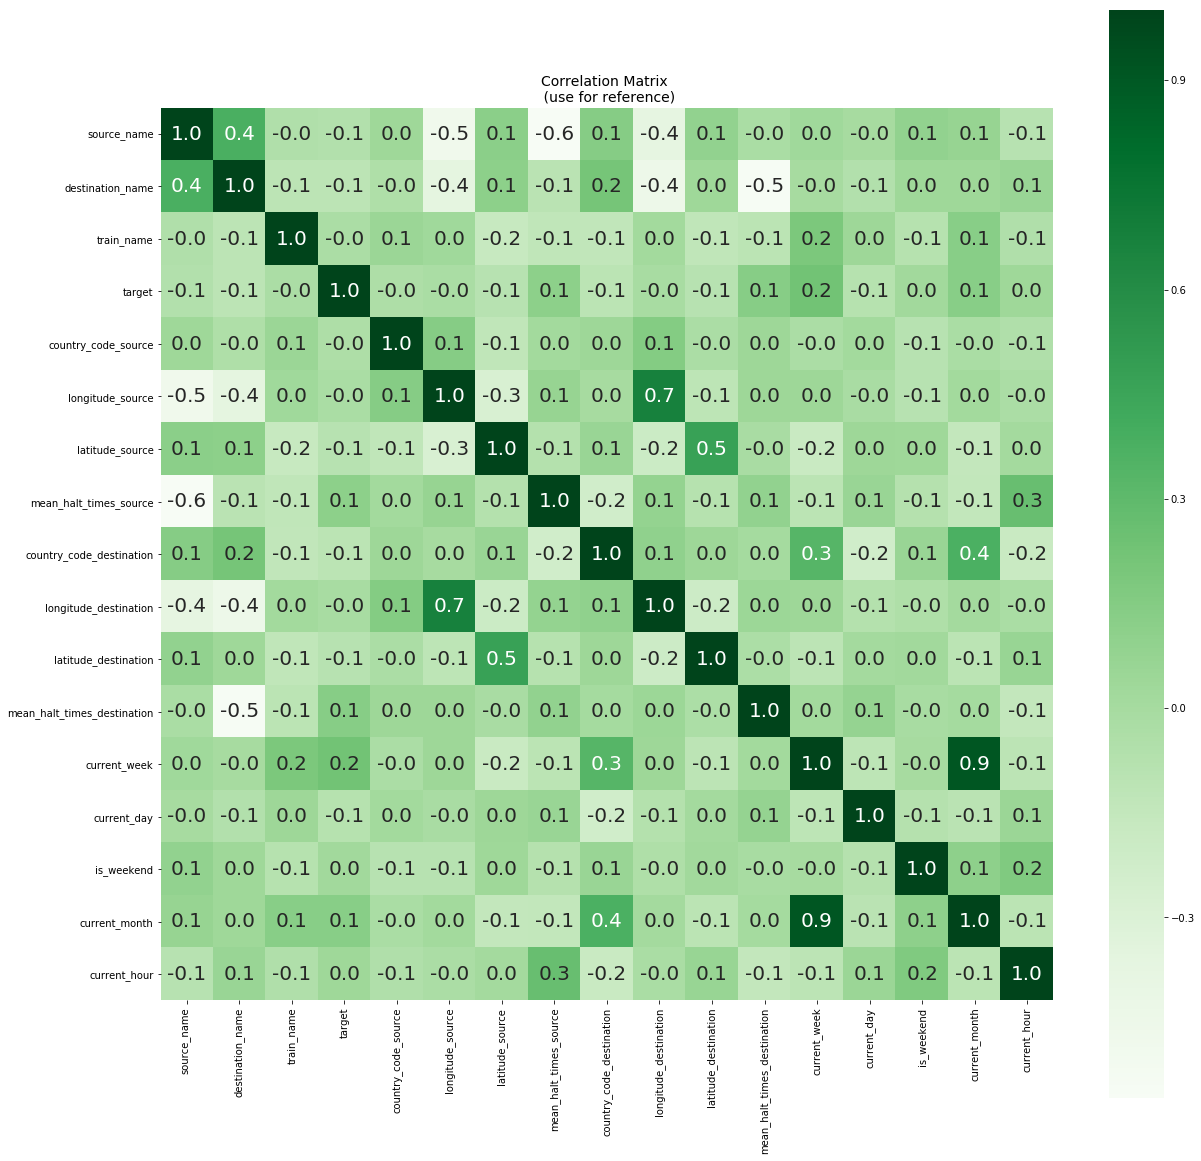

In [40]:
# Heatmap
corr = train_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':20}, cmap='Greens')
plt.title('Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

## Building the ML models

In [41]:
# Undersampling before cross validating (prone to overfit)
X = train_data.drop('target', axis=1)
y = train_data['target']

In [42]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [43]:
# A function to create confusion matrix function to find out sensitivity and specificity
from sklearn.metrics import confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

## Logistic Regression

In [44]:
# Logistic Regression

# Import library for LogisticRegression
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, y_train)

F:\Installed\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Installed\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
# Prediction on test data
y_pred = logreg.predict(X_test)

In [46]:
# Calculating the accuracy, precision and the recall
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_logreg )

Total Accuracy :  55.25


In [47]:
# Create confusion matrix function to find out sensitivity and specificity
from sklearn.metrics import confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

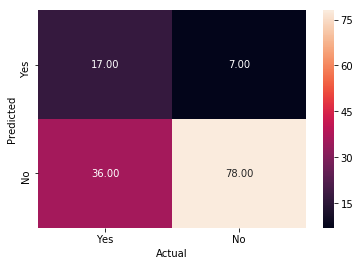

In [48]:
# Confusion matrix 
draw_cm(y_test, y_pred)

## Gaussian Naive Bayes

In [49]:
# Gaussian Naive Bayes

# Import library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [50]:
# Prediction on test set
y_pred = model.predict(X_test)

In [51]:
# Calculating the accuracy, precision and the recall
acc_nb = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_nb )

Total Accuracy :  42.02


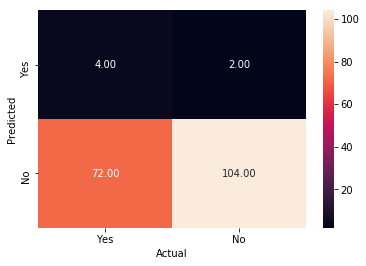

In [52]:
# Confusion matrix 
draw_cm(y_test, y_pred)

## Decision Tree Classifier

In [53]:
# Decision Tree Classifier

# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

# Train the model using the training sets 
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
# Model prediction on train data
y_pred = clf.predict(X_train)

In [55]:
# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, clf.tree_.compute_feature_importances()])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[1:10]

No handles with labels found to put in legend.


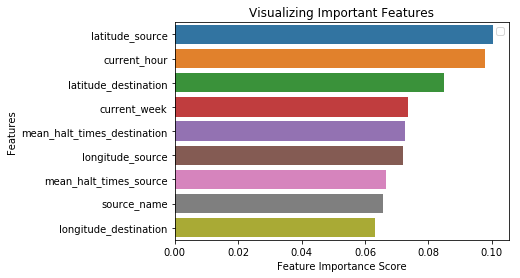

In [56]:
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [57]:
# Prediction on test set
y_pred = clf.predict(X_test)

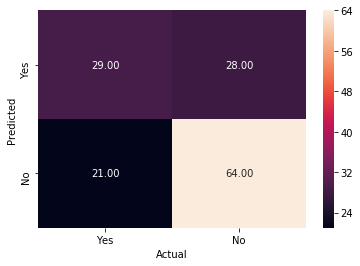

In [58]:
# Confusion matrix
draw_cm(y_test, y_pred)

In [59]:
# Calculating the accuracy, precision and the recall
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_dt )

Total Accuracy :  52.53


## Random Forest Classifier

In [60]:
# Random Forest Classifier

# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Train the model using the training sets 
rf.fit(X_train,y_train)

F:\Installed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

No handles with labels found to put in legend.


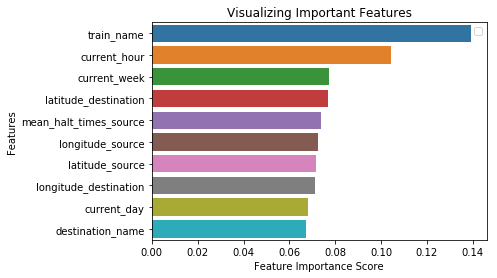

In [61]:
# Finding the variable with more importance
feature_imp = pd.Series(rf.feature_importances_,index= X_train.columns).sort_values(ascending=False)
# Creating a bar plot
feature_imp=feature_imp[0:10,]
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [62]:
# Prediction on test data
y_pred = rf.predict(X_test)

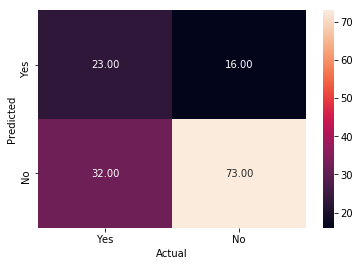

In [63]:
# Confusion metrix
draw_cm(y_test, y_pred)

In [64]:
# Calculating the accuracy, precision and the recall
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Total Accuracy : ', acc_rf )

Total Accuracy :  55.64


## K - Nearest Neighbors

In [65]:
# K - Nearest Neighbors

# Import library of KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn = KNeighborsClassifier()

# Train the model using the training sets 
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [66]:
# Prediction on test data
y_pred = knn.predict(X_test)

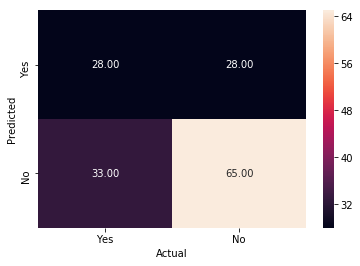

In [67]:
# Confusion Matrix
draw_cm(y_test, y_pred)

In [68]:
# Calculating the accuracy, precision and the recall
acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_knn )

Total Accuracy :  45.14


## XGBoost

In [69]:
# eXtreme Gradient Boosting

# Import library of xgboost model
from xgboost import XGBClassifier, plot_importance

# Create a XGB Classifier
gbm = XGBClassifier(learning_rate=0.02, n_estimators=1000, objective='multi:softmax', silent=True, nthread=1, num_class=5)

# # A parameter grid for XGBoost for Hyperparameter Optimization
# parameters = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.1, 0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 5, 6]
#         }

# # Run the grid search
# grid_obj = GridSearchCV(gbm, parameters)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the rf to the best combination of parameters
# gbm = grid_obj.best_estimator_

# Train the model using the training sets
gbm.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=1, num_class=5, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [70]:
# Prediction on test data
y_pred = gbm.predict(X_test)

In [71]:
# Calculating the accuracy, precision and the recall
acc_xgb = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Total Accuracy : ', acc_xgb )

Total Accuracy :  57.2


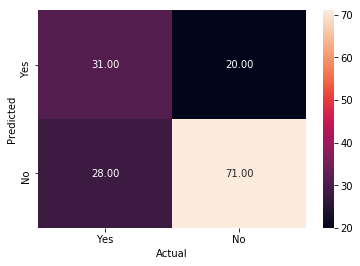

In [72]:
# Confusion matrix 
draw_cm(y_test, y_pred)

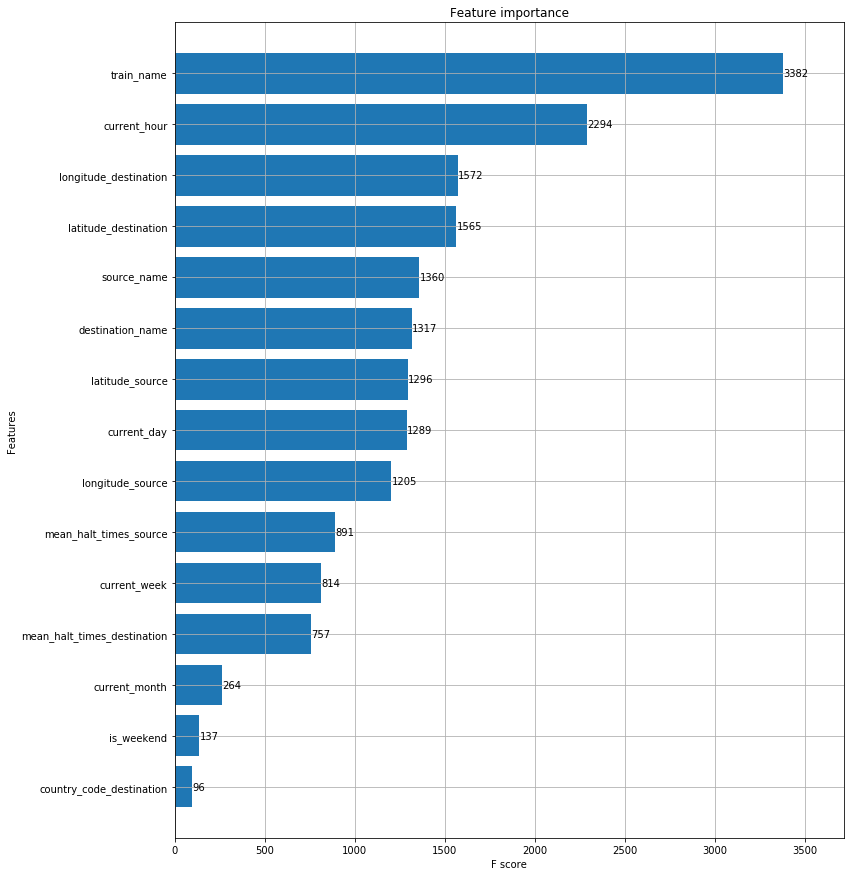

In [73]:
# Feature Engineering
fig, ax = plt.subplots(figsize=(12,15))
plot_importance(gbm, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [74]:
gbm.get_booster().get_score(importance_type="gain")

{'current_week': 3.028268603383536,
 'destination_name': 1.5511887982729673,
 'current_day': 1.3407361805380917,
 'latitude_destination': 1.5795756641539938,
 'train_name': 1.3230099386546001,
 'longitude_source': 1.4547769742685632,
 'current_hour': 1.2550518542927815,
 'source_name': 1.305888785654706,
 'country_code_destination': 6.595425615593746,
 'longitude_destination': 1.190017957680281,
 'latitude_source': 1.265673020379516,
 'mean_halt_times_source': 1.457872670857912,
 'mean_halt_times_destination': 1.4902440133447818,
 'is_weekend': 1.4433148625182481,
 'current_month': 1.1361951086136364}

## SVM Classifier

In [75]:
# SVM Classifier

# Creating scaled set to be used in model to improve the results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

F:\Installed\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
F:\Installed\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
F:\Installed\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [76]:
# Import Library of Support Vector Machine model
from sklearn import svm

# Create a Support Vector Classifier
svc = svm.SVC()

# Train the model using the training sets 
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [77]:
# Prediction on test data
y_pred = svc.predict(X_test)

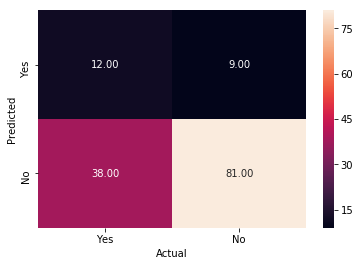

In [78]:
# Confusion Matrix
draw_cm(y_test, y_pred)

In [79]:
# Calculating the accuracy, precision and the recall
acc_svm = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_svm )

Total Accuracy :  52.53


## Evaluating and Comparing the models

In [80]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors', 'XGBoost'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn, acc_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,XGBoost,57.20
3,Random Forest,55.64
0,Logistic Regression,55.25
2,Decision Tree,52.53
4,Support Vector Machines,52.53
5,K - Nearest Neighbors,45.14
1,Naive Bayes,42.02


In [81]:
# Predicting on the test dataset
my_pred = gbm.predict(test_data)

In [82]:
my_submission['target'] = my_pred

In [83]:
my_submission.shape

(964, 2)

In [84]:
my_submission['target'] = my_submission['target'].replace(0, 'low')
my_submission['target'] = my_submission['target'].replace(1, 'medium')
my_submission['target'] = my_submission['target'].replace(2, 'high')

In [85]:
# Saving predictions to file
# my_submission.to_csv('submission.csv', index=False)
print('Saved file to disk.')

Saved file to disk.
